In [ ]:
Group 4: Wenhan, Fengrui, Umair, Mimi

Objective:
Try to define probability for a patient to have a disease on their tooth supporting tissues from simple data that can be acquired remotely. It is to define the risk factors to develop such diseases.


Features:

ID	ID of the subject
Sex	
Age	
BMI	Body Mass Index
Smoking	Smoking consumption
Pathologies	Systemic diseases
Pregnant	Yes/No
Food_Sugar	Consumption of sweet foods 
Fat_Salty	Consumption of fatty or salty foods 
Soda	Consumption of soda
Alcohol	Consumption of alcohol
Frequence_Appoint_Dentist	Frequency of Dental Surgeon Appointments
Hygiene_Dental	Dental hygiene (number of brushing teeth a day)
Gingivorrhagia	Gingival bleeding
Stress_Daily	Is the patient stressed (How many times he/she feels strees daily)
PI	Dental plaque quantity
Diagnosis	Periodontal diagnosis (to predict)

ID	1 - 248
Sex	Male/Femal
Age	0 - 80
BMI	Body Mass Index (weight/height^2)
Smoking	'Previous smoker''No smoker''Smoker'
Pathologies	Yes/No
Pregnant	Yes/No
Food_Sugar	'Never''Sometimes''Several times a week''Once a day''Several times a day'
Fat_Salty	'Never''Sometimes''Several times a week''Once a day''Several times a day'
Soda	'Never''Sometimes''Several times a week''Once a day''Several times a day'
Alcohol	'Never''Sometimes''Several times a week''Once a day''Several times a day'
Frequence_Appoint_Dentist	'Never''Once a year''2-3 a year''Regularly'
Hygiene_Dental	0 - 6
Gingivorrhagia	'Absent''Provoked''Spontanées''Corrélées (cycle, etc…)'
Stress_Daily	1 - 10
PI	0 - 3

Labels:
Diagnosis	'Gingivitis''Periodontitis''Healthy'

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessClassifier


def data_preprocess():
    # Import dataset to panda data frame
    data1 = pd.read_excel("/Users/ethanyang/Desktop/2IS/2IS-M12/Computational_Intelligence/data1.xlsx")
    pd.set_option('display.max_columns', 20)
    data1 = data1.dropna(axis=0, subset=['Diagnosis'])
    
    # Convert string class to numerical class
    data1['Sex'] = data1['Sex'].astype('category')
    data1['Sex'] = data1['Sex'].cat.codes

    data1['Smoking'] = data1['Smoking'].astype('category')
    data1['Smoking'] = data1['Smoking'].cat.codes
    
    data1['Pathologies'] = data1['Pathologies'].astype('category')
    data1['Pathologies'] = data1['Pathologies'].cat.codes

    data1['Pregnant'] = data1['Pregnant'].astype('category')
    data1['Pregnant'] = data1['Pregnant'].cat.codes

    data1['Food_Sugar'] = data1['Food_Sugar'].astype('category')
    data1['Food_Sugar'] = data1['Food_Sugar'].cat.codes

    data1['Fat_Salty'] = data1['Fat_Salty'].astype('category')
    data1['Fat_Salty'] = data1['Fat_Salty'].cat.codes

    data1['Soda'] = data1['Soda'].astype('category')
    data1['Soda'] = data1['Soda'].cat.codes

    data1['Alcohol'] = data1['Alcohol'].astype('category')
    data1['Alcohol'] = data1['Alcohol'].cat.codes
    
    data1['Frequence_Appoint_Dentist'] = data1['Frequence_Appoint_Dentist'].astype('category')
    data1['Frequence_Appoint_Dentist'] = data1['Frequence_Appoint_Dentist'].cat.codes

    data1['Gingivorrhagia'] = data1['Gingivorrhagia'].astype('category')
    data1['Gingivorrhagia'] = data1['Gingivorrhagia'].cat.codes

    data1['Diagnosis'] = data1['Diagnosis'].astype('category')
    data1['Diagnosis'] = data1['Diagnosis'].cat.codes

    # print(data1.iloc[0:30,:])
    # data1.info()
    
    # data normalization
    data1.iloc[:, 1:15] = (data1.iloc[:, 1:15] - data1.iloc[:, 1:15].min()) / (
            data1.iloc[:, 1:15].max() - data1.iloc[:, 1:15].min())  
#     print(data1)
    return data1
data_preprocess()

,ID,Sex,Age,BMI,Smoking,Pathologies,Pregnant,Food_Sugar,Fat_Salty,Soda,Alcohol,Frequence_Appoint_Dentist,Hygiene_Dental,Gingivorrhagia,Stress_Daily,PI,Diagnosis
0,1,1.0,0.710526,0.501731,0.5,0.5,0.5,0.00,1.00,0.00,0.75,0.50,0.333333,0.000000,0.444444,1.0,0
1,2,1.0,0.776316,0.312346,0.5,1.0,0.5,1.00,1.00,1.00,1.00,0.75,0.500000,0.000000,0.444444,1.0,2
2,3,1.0,0.078947,0.099392,0.0,1.0,0.5,0.75,1.00,1.00,0.00,0.25,0.333333,0.000000,0.333333,1.0,1
3,4,0.0,0.263158,0.310813,0.0,0.5,0.0,0.75,0.00,0.75,0.75,0.75,0.500000,0.000000,0.111111,0.0,1
4,5,1.0,0.276316,0.241649,0.0,0.5,0.5,0.25,0.75,0.00,1.00,1.00,0.333333,0.000000,0.444444,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,222,1.0,1.000000,0.574678,0.5,0.5,0.5,1.00,1.00,0.25,1.00,0.75,0.666667,0.333333,0.555556,3.0,2
213,230,0.0,0.210526,0.336159,0.0,1.0,0.0,1.00,1.00,1.00,1.00,0.75,0.500000,0.000000,0.444444,0.0,1
215,232,0.0,0.171053,0.443227,0.0,0.5,0.0,1.00,1.00,1.00,0.00,0.50,0.333333,0.000000,0.222222,1.0,1
216,233,1.0,0.131579,0.115890,0.0,0.5,0.5,0.75,0.75,0.50,0.00,0.75,0.333333,0.000000,0.666667,0.0,1


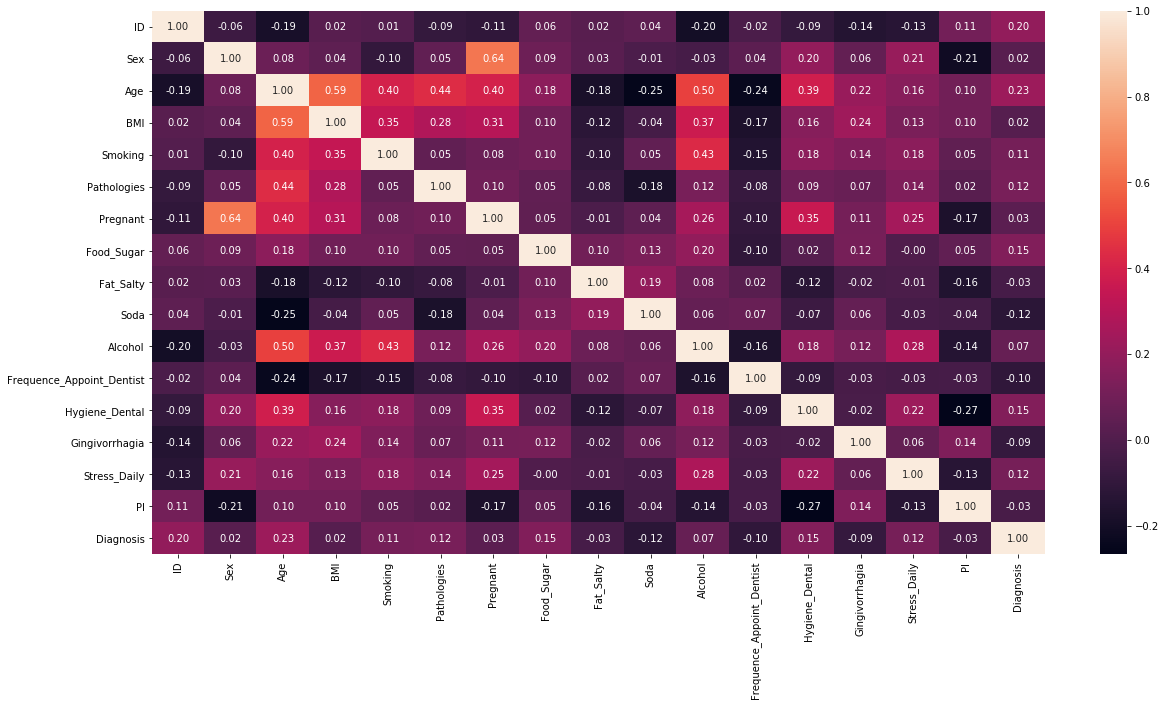

In [27]:
def cal_correlation():
    # Calculate the correlation
    data = data_preprocess()
    corr = data.corr()
#     print(corr)
    plt.figure(figsize = (20,10))
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.show()
cal_correlation()

In [28]:
def data_select(i):
    data = data_preprocess()
    if i == 0:
        data1 = data.iloc[:, 1:17]
        print('All features')
    if i == 1:
        data1 = data.loc[:, ['Age', 'Smoking', 'Pathologies', 'Food_Sugar', 'Soda', 'Frequence_Appoint_Dentist', 'Stress_Daily', 'Hygiene_Dental', 'Diagnosis']]   #use the correlated features
        print('Correlated features')
    if i == 2:
        data1 = pca_process()  # using data reduced dimension from PCA
        print('PCA process')
    data1 = data1.dropna(axis=0)
    return data1

In [29]:
def pca_process():
    # PCA
    data1 = data_select(1)
    number_components = 6
    pca = PCA(n_components=number_components)
    x_pca = data1.loc[:, data1.columns != 'Diagnosis']
    y_pca = data1.loc[:, ['Diagnosis']]
    # X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, random_state=0, stratify=y_target)
    pca.fit(x_pca)
    X_train_pca = pd.DataFrame(pca.transform(x_pca))
    data2 = pd.DataFrame(np.hstack([X_train_pca, y_pca]))
    data2 = data2.rename(columns={number_components: 'Diagnosis'})
    return data2

In [30]:
def decision_tree():
    # Decision Tree
    for i in [0, 1, 2]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        Dt = DecisionTreeClassifier(max_depth=5)
        #split validation
        X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.12, random_state=53)
        Dt.fit(X_train, Y_train)
        train_score = Dt.score(X_train, Y_train)
        test_score = Dt.score(X_test, Y_test)
        print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
        #K-fold validation
        kfold = model_selection.KFold(n_splits=10)
        results_kfold = model_selection.cross_val_score(Dt, x_data, np.ravel(y_data, order='C'), cv=kfold)
        print("Accuracy: %.2f%%" % (results_kfold.mean() * 100.0))
        #leave one out validatoin
        loocv = LeaveOneOut()
        results_loocv = model_selection.cross_val_score(Dt, x_data, np.ravel(y_data, order='C'), cv=loocv)
        print("Accuracy: %.2f%%" % (results_loocv.mean() * 100.0))
decision_tree()

All features
Train Acc: 0.880, Test Acc: 0.714
Accuracy: 66.18%
Accuracy: 71.93%
Correlated features
Train Acc: 0.868, Test Acc: 0.714
Accuracy: 74.64%
Accuracy: 73.84%
Correlated features
PCA process
Train Acc: 0.927, Test Acc: 0.667
Accuracy: 67.71%
Accuracy: 63.37%


In [31]:
def support_vector():
    for i in [0, 1, 2]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        sv = SVC(kernel='linear', gamma=9, C=9)
        #split validation
        X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=53)
        sv.fit(X_train, np.ravel(Y_train, order='C'))
        train_score = sv.score(X_train, Y_train)
        test_score = sv.score(X_test, Y_test)
        print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
        # K-fold validation
        kfold = model_selection.KFold(n_splits=10)
        results_kfold = model_selection.cross_val_score(sv, x_data, np.ravel(y_data, order='C'), cv=kfold)
        print("Accuracy: %.2f%%" % (results_kfold.mean() * 100.0))
        # leave one out validatoin
        loocv = LeaveOneOut()
        results_loocv = model_selection.cross_val_score(sv, x_data, np.ravel(y_data, order='C'), cv=loocv)
        print("Accuracy: %.2f%%" % (results_loocv.mean() * 100.0))
support_vector()

All features
Train Acc: 0.859, Test Acc: 0.744
Accuracy: 73.14%
Accuracy: 73.10%
Correlated features
Train Acc: 0.798, Test Acc: 0.721
Accuracy: 74.67%
Accuracy: 76.16%
Correlated features
PCA process
Train Acc: 0.806, Test Acc: 0.698
Accuracy: 71.08%
Accuracy: 75.00%


In [33]:
def neural_network():
    for i in [0, 1, 2]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        clf = MLPClassifier(hidden_layer_sizes=(4,2), solver='sgd',
                            batch_size=4, learning_rate_init=0.005,
                            max_iter=500, shuffle=True)
        #split validation
        X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=53)
        clf.fit(X_train, np.ravel(Y_train, order='C'))
        print("Number of layers: ", clf.n_layers_)
        print("Number of outputs: ", clf.n_outputs_)
        train_score = clf.score(X_train, Y_train)
        test_score = clf.score(X_test, Y_test)
        print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
        # K-fold validation
        kfold = model_selection.KFold(n_splits=10)
        results_kfold = model_selection.cross_val_score(clf, x_data, np.ravel(y_data, order='C'), cv=kfold)
        print("Accuracy: %.2f%%" % (results_kfold.mean() * 100.0))
        # leave one out validatoin
        loocv = LeaveOneOut()
        results_loocv = model_selection.cross_val_score(clf, x_data, np.ravel(y_data, order='C'), cv=loocv)
        print("Accuracy: %.2f%%" % (results_loocv.mean() * 100.0))
neural_network()

All features
Number of layers:  4
Number of outputs:  3
Train Acc: 0.930, Test Acc: 0.791
Accuracy: 69.58%
Accuracy: 75.44%
Correlated features
Number of layers:  4
Number of outputs:  3
Train Acc: 0.798, Test Acc: 0.744
Accuracy: 72.88%
Accuracy: 72.09%
Correlated features
PCA process
Number of layers:  4
Number of outputs:  3
Train Acc: 0.814, Test Acc: 0.628
Accuracy: 71.11%
Accuracy: 70.93%


In [32]:
def GP_Classifier():
    for i in [0, 1, 2]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        gpc = GaussianProcessClassifier(random_state = 53)
        # split validation
        X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=53)
        gpc.fit(X_train, np.ravel(Y_train, order='C'))
        train_score = gpc.score(X_train, Y_train)
        test_score = gpc.score(X_test, Y_test)
        print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
        # K-fold validation
        kfold = model_selection.KFold(n_splits=10)
        results_kfold = model_selection.cross_val_score(gpc, x_data, np.ravel(y_data, order='C'), cv=kfold)
        print("Accuracy: %.2f%%" % (results_kfold.mean() * 100.0))
        # leave one out validatoin
        loocv = LeaveOneOut()
        results_loocv = model_selection.cross_val_score(gpc, x_data, np.ravel(y_data, order='C'), cv=loocv)
        print("Accuracy: %.2f%%" % (results_loocv.mean() * 100.0))
GP_Classifier()

All features
Train Acc: 0.836, Test Acc: 0.767
Accuracy: 71.41%
Accuracy: 70.76%
Correlated features
Train Acc: 0.752, Test Acc: 0.674
Accuracy: 72.84%
Accuracy: 72.67%
Correlated features
PCA process
Train Acc: 0.752, Test Acc: 0.674
Accuracy: 73.43%
Accuracy: 72.67%
